This notebook is a continuation of MW_star_subtraction

In [22]:
###Import the usual libraries

import numpy as np

import astropy
from astropy.io import fits, ascii
from astropy.table import Table, Column, vstack, hstack

import matplotlib
from matplotlib.patches import Ellipse
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 24}) #make plots more readable

#from scipy.stats import kurtosis, skew, iqr

In [14]:
###Import the Gaia data for 1 degree diamater region around the above points

filepath1 = '/Users/joshpovick/Desktop/Research/fits/gaialmcper_1degdia.fits' #ra: 64.24290029 dec:-76.4305723
filepath2 = '/Users/joshpovick/Desktop/Research/fits/gaiasmcper_1degdia.fits' #ra: 24.05542837 dec:-74.78460052

lmcper = fits.getdata(filepath1,1)
smcper = fits.getdata(filepath2,1)

bes = astropy.io.ascii.read('/Users/joshpovick/Desktop/Research/MS_young/besancon.dat')
mpmra = bes['mux']*10.0
mpmdec = bes['muy']*10.0

#Table of Red Giant Branch ID for LMC and SMC
lidrg = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/lidrg.dat')
sidrg = ascii.read('/Users/joshpovick/Desktop/Research/MS_young/sidrg.dat')

In [34]:
###Parallax Cut for RGB LMC stars
lid = []
for i0 in range(len(lidrg)):
    lid.append(int(lidrg['LMC_RGB_ID'][i0]))

copy_lmcper = np.copy(lmcper)
copy_lmcper = Table(copy_lmcper)
rglmcper = copy_lmcper[lid]
clean_parallax = np.where(np.isfinite(rglmcper['parallax']))
rglmcper = rglmcper[clean_parallax]
clean_para_err = np.where(np.isfinite(rglmcper['parallax_error']))
rglmcper = rglmcper[clean_para_err]
para_err_cut = np.where(rglmcper['parallax']<3.0*rglmcper['parallax_error'])
para_rglmcper = rglmcper[para_err_cut]

plpmra  = para_rglmcper['pmra']
plpmdec = para_rglmcper['pmdec']

In [36]:
rglmcper.show_in_browser(jsviewer=True)

In [35]:
###SMC stars' proper motions
sid = []
for i1 in range(len(sidrg)):
    sid.append(int(sidrg['SMC_RGB_ID'][i1]))

copy_smcper = np.copy(smcper)
copy_smcper = Table(copy_smcper)
rgsmcper = copy_smcper[sid]
clean_pmra_smc = np.where(np.isfinite(rgsmcper['pmra']))
rgsmcper = rgsmcper[clean_pmra_smc]
clean_pmdec_smc = np.where(np.isfinite(rgsmcper['pmdec']))
rgsmcper = rgsmcper[clean_pmdec_smc]

spmra = rgsmcper['pmra']
spmdec = rgsmcper['pmdec']

In [17]:
###Median Absolute Deviation
def mad(xdata):
    return np.nanmedian(np.absolute(xdata-np.nanmedian(xdata)))

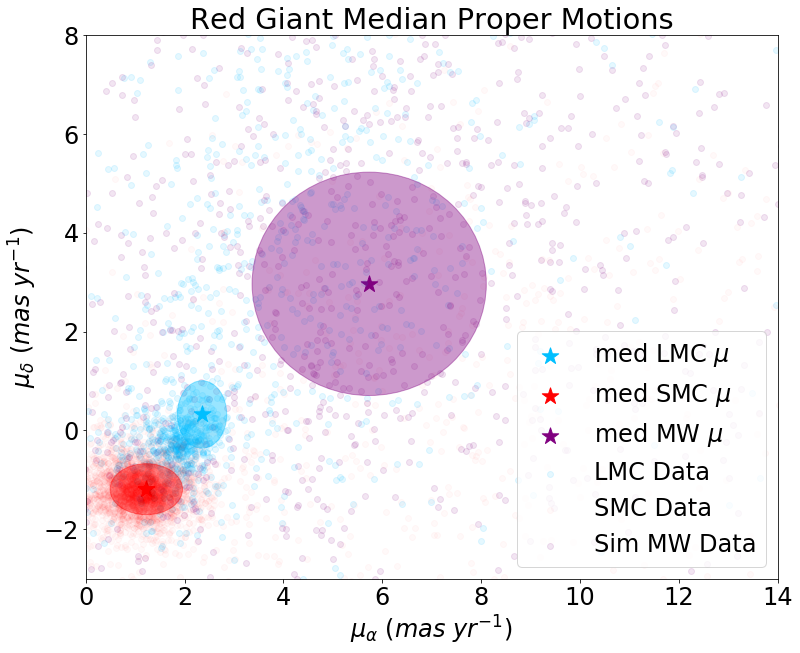

In [43]:
###Median plot for the three data sets with the spread as ellipses

ells  = [Ellipse(xy = (np.nanmedian(plpmra),np.nanmedian(plpmdec)),width=mad(plpmra),height=mad(plpmdec), \
                color='deepskyblue'), Ellipse(xy = (np.nanmedian(spmra),np.nanmedian(spmdec)),width=mad(spmra)*3, \
                height=mad(spmdec)*3,color='red'), Ellipse(xy = (np.nanmedian(mpmra),np.nanmedian(mpmdec)), \
                width=mad(mpmra), height=mad(mpmdec),color='purple')]

plt.figure(figsize=[15,10])
a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.4)
    a.add_artist(e)

plt.scatter(np.nanmedian(plpmra),np.nanmedian(plpmdec),c='deepskyblue',marker='*',s=300,label='med LMC $\mu$')
plt.scatter(np.nanmedian(spmra),np.nanmedian(spmdec),c='red',marker='*',s=300,label='med SMC $\mu$')
plt.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='purple',marker='*',s=300,label='med MW $\mu$')
plt.scatter(plpmra,plpmdec,c='deepskyblue',label='LMC Data',alpha=0.1)
plt.scatter(spmra,spmdec,c='red',label='SMC Data',alpha=0.025)
plt.scatter(mpmra,mpmdec,c='purple',label='Sim MW Data',alpha=0.1)
plt.title('Red Giant Median Proper Motions')
plt.xlabel('$\mu_{\\alpha}$ $(mas$ $yr^{-1}$)')
plt.ylabel('$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
plt.xlim(0,14)
plt.ylim(-3,8)
#$plt.savefig('cutrgmedians.pdf',bbox_inches='tight')
plt.legend()
plt.show()

Since the ellipse for the LMC is not centered on the cluster, an outlier cut will be made at 3 mad and the median and new mad will be calculated

In [50]:
def ell(gaia_table):
    x = gaia_table['pmra']
    y = gaia_table['pmdec']
    h = np.nanmedian(gaia_table['pmra'])
    k = np.nanmedian(gaia_table['pmdec'])
    amad = mad(gaia_table['pmra'])
    bmad = mad(gaia_table['pmdec']) 
    return ((x-h)**2/amad**2)+((y-k)**2/bmad**2)

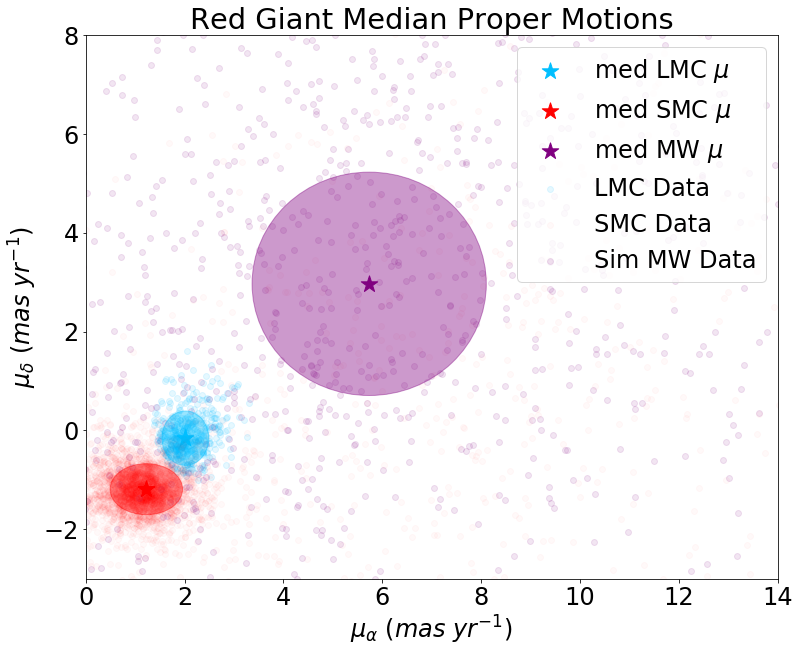

In [75]:
#Outlier cut number 1
out = np.where(ell(para_rglmcper)<=1)
outrglmcper = para_rglmcper[out]

outplpmra  = outrglmcper['pmra']
outplpmdec = outrglmcper['pmdec']

outells  = [Ellipse(xy = (np.nanmedian(outplpmra),np.nanmedian(outplpmdec)),width=mad(outplpmra)*4.5,\
            height=mad(outplpmdec)*4.5,color='deepskyblue'), Ellipse(xy = (np.nanmedian(spmra),np.nanmedian(spmdec)),\
            width=mad(spmra)*3,height=mad(spmdec)*3,color='red'), Ellipse(xy = (np.nanmedian(mpmra),\
            np.nanmedian(mpmdec)),width=mad(mpmra), height=mad(mpmdec),color='purple')]

plt.figure(figsize=[15,10])
a = plt.subplot(111, aspect='equal')

for e in outells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.4)
    a.add_artist(e)

plt.scatter(np.nanmedian(outplpmra),np.nanmedian(outplpmdec),c='deepskyblue',marker='*',s=300,\
            label='med LMC $\mu$')
plt.scatter(np.nanmedian(spmra),np.nanmedian(spmdec),c='red',marker='*',s=300,label='med SMC $\mu$')
plt.scatter(np.nanmedian(mpmra),np.nanmedian(mpmdec),c='purple',marker='*',s=300,label='med MW $\mu$')
plt.scatter(outplpmra,outplpmdec,c='deepskyblue',label='LMC Data',alpha=0.1)
plt.scatter(spmra,spmdec,c='red',label='SMC Data',alpha=0.025)
plt.scatter(mpmra,mpmdec,c='purple',label='Sim MW Data',alpha=0.1)
plt.title('Red Giant Median Proper Motions')
plt.xlabel('$\mu_{\\alpha}$ $(mas$ $yr^{-1}$)')
plt.ylabel('$\mu_{\delta}$ $(mas$ $yr^{-1}$)')
plt.xlim(0,14)
plt.ylim(-3,8)
#$plt.savefig('cutrgmedians.pdf',bbox_inches='tight')
plt.legend()
plt.show()